# Fasion MNIST Dataset Classification with Neural Networks

## Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

- To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
- For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

### Labels

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot


### TL;DR

- Each row is a separate image
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255)


**Source of Description and Dataset: [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)**

## Importing Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import torchvision
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
from torch.autograd import Variable
#from torchviz import make_dot

## Loading and exploring the Dataset

In [3]:
df_train = pd.read_csv("fashion-mnist_train.csv")

In [4]:
X_train = df_train.iloc[:,1:]
y_train = df_train['label']

In [5]:
df_train.shape

(60000, 785)

In [6]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test =  pd.read_csv("fashion-mnist_test.csv")

In [8]:
X_test = df_test.iloc[:,1:]
y_test = df_test['label']

In [9]:
df_test.shape

(10000, 785)

In [10]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (60000, 784)
X_test shape :  (10000, 784)
y_train shape :  (60000,)
y_test shape :  (10000,)


## Normalizing and Reshaping

In [12]:
# Noramlizing the dataset
X_train = X_train / 255
X_test = X_test / 255

In [13]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

## Looking at some images in the dataset

In [14]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

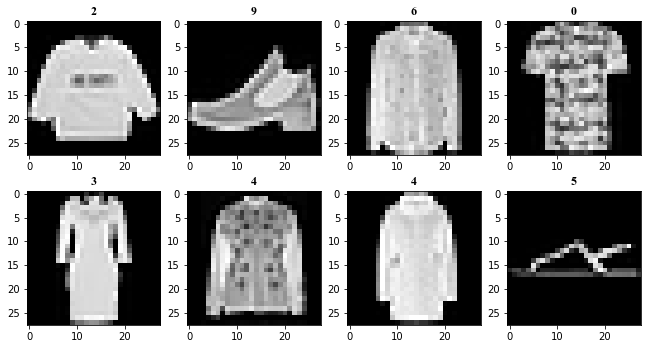

In [15]:
fig = plt.figure(figsize = (11,12))

for i in range(8):
    plt.subplot(4,4,1 + i)
    plt.imshow(X_train[i,:,:,0], cmap = plt.get_cmap('gray'))
    plt.title(y_train[i], fontname = 'Times New Roman', fontweight = 'bold')

## Building the model

In [16]:
X_train = torch.from_numpy(X_train.astype('float32'))
y_train = torch.from_numpy(y_train.to_numpy())


In [17]:
X_test = torch.from_numpy(X_test.astype('float32'))
y_test = torch.from_numpy(y_test.to_numpy())

In [18]:
dataset_train = TensorDataset(X_train, y_train)
dataset_test = TensorDataset(X_test, y_test)

In [19]:
train_loader = DataLoader(dataset_train, batch_size=10)
test_loader = DataLoader(dataset_test, batch_size=10)

loaders = {'train' : train_loader, 
            'test' : test_loader}

In [20]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
                
        self.fc1 = nn.Linear(28*28*1, 512)
        self.fc2 = nn.Linear(512, 484)
        self.fc3 = nn.Linear(484, 256)
        #self.pool = nn.MaxPool2d(2, 2)   
        self.fc4 = nn.Linear(256, 64)
        self.fc5 = nn.Linear(64, 10) 
        self.dropout = nn.Dropout(0.25) 
        self.batch_norm = nn.BatchNorm1d(64)
    
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        #x = self.pool(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        #x = self.pool(x)
        
        x = self.fc3(x)
        x = F.relu(x)
        #x = self.pool(x)               
                              
        x = self.fc4(x)
        x = self.batch_norm(x)
        x = F.relu(x)
       
        x = self.dropout(x)   
        x = self.fc5(x)
        x = F.relu(x)
               
        return x

### Model Architecture

In [ ]:
model

In [ ]:
from torchsummary import summary
summary(model,(10,784))

### Training the model

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = FashionMNISTModel()
model.to(device)
use_cuda = torch.cuda.is_available()

In [29]:
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
a = next(iter(train_loader))
a[0].size()

torch.Size([10, 28, 28, 1])

In [31]:
def train_model(n_epochs, loader, model, optimizer, criterion, use_cuda, save_path):
    loss_minimum_valid = np.Inf
    J_history = {'train':[], 'valid': []}
    J_history_min = []
    
    for epoch in range(n_epochs):
        train_loss = 0
        valid_loss = 0
        
        # Training the model
        model.train()
        for batch_idx, (image, label) in enumerate(loader['train']):
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            # preprocessing
            label = label.type(torch.LongTensor)
            image = image.view(image.size(0), -1)
            labels = Variable(label)
            optimizer.zero_grad()
            output = model(image)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        J_history['train'].append(train_loss)
        # Validating the model
        model.eval()
        for batch_idx, (image, level) in enumerate(loader['test']):
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            # preprocessing
            #label = label.type(torch.LongTensor)
            #image = image.view(image.shape[0], -1)
            image = image.view(image.size(0), -1)
            labels = Variable(label)
            output = model(image)
            loss = criterion(output, label)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        J_history['valid'].append(valid_loss)
        
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss < loss_minimum_valid:
            print("Saving model. Validation loss has decreased to {:.6f}".format(valid_loss))
            torch.save(model.state_dict(), save_path)
            J_history_min.append(loss_minimum_valid)
            loss_minimum_valid = valid_loss
    return model, J_history, J_history_min

In [62]:
model, J_history, J_history_min = train_model(50, loaders, model, optimizer, 
                      criterion, use_cuda, 'model.pt')

Epoch: 0 	Training Loss: -1696482.875000 	Validation Loss: -1366327.125000
Saving model. Validation loss has decreased to -1366327.125000
Epoch: 1 	Training Loss: -1804973.625000 	Validation Loss: -1452365.625000
Saving model. Validation loss has decreased to -1452365.625000
Epoch: 2 	Training Loss: -1919360.125000 	Validation Loss: -1541479.125000
Saving model. Validation loss has decreased to -1541479.125000
Epoch: 3 	Training Loss: -2035311.500000 	Validation Loss: -1633495.625000
Saving model. Validation loss has decreased to -1633495.625000
Epoch: 4 	Training Loss: -2155689.750000 	Validation Loss: -1724550.375000
Saving model. Validation loss has decreased to -1724550.375000
Epoch: 5 	Training Loss: -2279107.750000 	Validation Loss: -1830830.750000
Saving model. Validation loss has decreased to -1830830.750000
Epoch: 6 	Training Loss: -2405857.000000 	Validation Loss: -1924567.125000
Saving model. Validation loss has decreased to -1924567.125000
Epoch: 7 	Training Loss: -2537483.

In [63]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

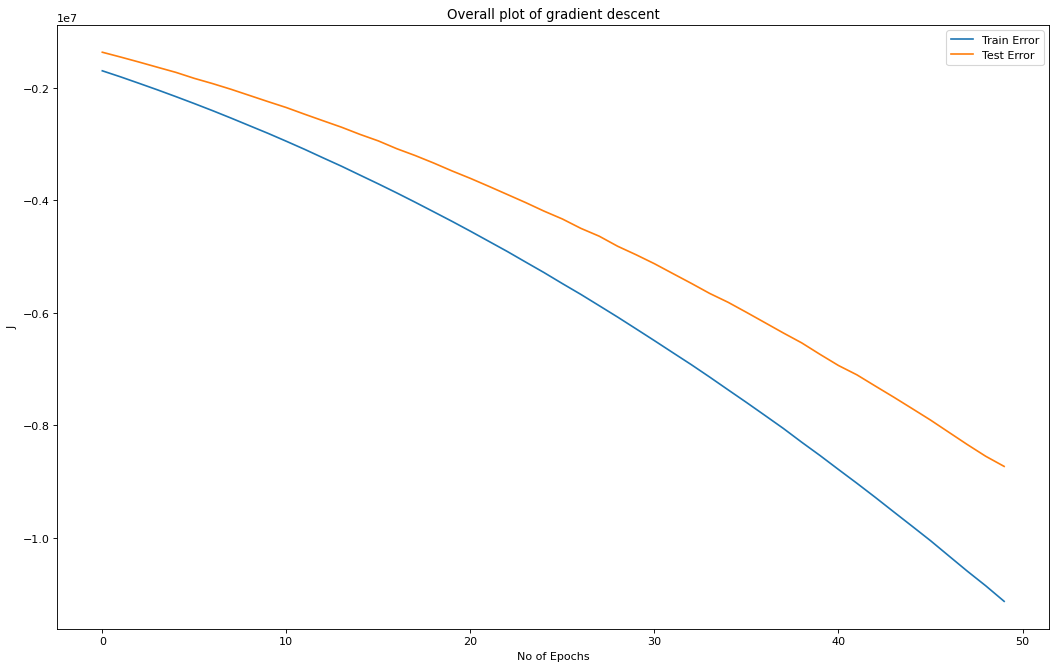

In [64]:
# plot the results
plt.figure(figsize=(16,10), dpi= 80)
x_axis = [int(x) for x in range(len(J_history['train']))]
plt.plot(x_axis, J_history['train'], label="Train Error")
plt.plot(x_axis, J_history['valid'], label="Test Error")
plt.title('Overall plot of gradient descent')
plt.xlabel('No of Epochs')
plt.legend()
plt.ylabel('J')
plt.show()

### Testing the model

In [65]:
def test_model(loader, model, criterion, use_cuda, dataset_type):
    test_loss = 0.
    correct = 0.
    total = 0.
    prediction_array = []
    label_array = []
    model.eval()
    for batch_idx, (image, label) in enumerate(loader[dataset_type]):
        if use_cuda:
            image, label = image.cuda(), label.cuda()
#         label = label.type(torch.LongTensor)
        image = image.view(image.size(0), -1)
        labels = Variable(label)
        output = model(image)
        loss = criterion(output, label)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(label.data.view_as(pred))).cpu().numpy())
        total += image.size(0)
        prediction_array.append(pred)
        label_array.append(label)
    print ("Testing for {} Dataset".format(dataset_type))
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    return prediction_array, label_array

In [66]:
pred_array, label_array = test_model(loaders, model, criterion, use_cuda, 'test')

Testing for test Dataset
Test Loss: -11604804.000000


Test Accuracy: 73% (7338/10000)


In [67]:
train_pred, train_lab = test_model(loaders, model, criterion, use_cuda, 'train')

Testing for train Dataset
Test Loss: -11675076.000000


Test Accuracy: 76% (45902/60000)


In [68]:
from itertools import chain 
predictions = [pred_array[i].tolist() for i in range(len(pred_array))]
labels = [label_array[i].tolist() for i in range(len(label_array))]
predictions = list(chain.from_iterable(predictions))
labels = list(chain.from_iterable(labels))

**Confusion Matrix**

In [69]:
import sklearn.metrics as metrics

confusion_matrix(labels, predictions)

array([[  2,   0,   7,   2,   0,   0, 985,   0,   4,   0],
       [  0, 985,   1,   6,   0,   0,   8,   0,   0,   0],
       [  0,   0, 799,   0,  10,   0, 190,   0,   1,   0],
       [  3,  11,   2, 805,   1,   0, 178,   0,   0,   0],
       [  0,   1,  64,   4,   8,   0, 923,   0,   0,   0],
       [  0,   0,   0,   0,   0, 929,  18,  33,   0,  20],
       [  1,   1,  63,   5,   1,   0, 926,   0,   3,   0],
       [  0,   0,   0,   0,   0,   4,  10, 959,   0,  27],
       [  0,   0,   1,   0,   0,   0,  33,   2, 964,   0],
       [  0,   0,   0,   0,   0,   4,   8,  27,   0, 961]], dtype=int64)

**Classification Report**

In [70]:
print("Classification report for Fasion MNIST Classification :\n%s\n"
      % (metrics.classification_report(labels, predictions)))

Classification report for Fasion MNIST Classification :
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.80      0.82      1000
           3       0.98      0.81      0.88      1000
           4       0.40      0.01      0.02      1000
           5       0.99      0.93      0.96      1000
           6       0.28      0.93      0.43      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.73     10000
   macro avg       0.77      0.73      0.70     10000
weighted avg       0.77      0.73      0.70     10000


